В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;

кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

# Пояснення до ДЗ.
Деякі варінти, які я спробував у моделях, закоментарені. Залишилося лише те, що дає найкращий результат.  
Кількість епох також вказано найоптимальніше для кожного випадку.

In [37]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, GlobalAvgPool2D
import tensorflow_datasets.public_api as tfds
import matplotlib.pyplot as plt


In [38]:
! pip install livelossplot

In [39]:
import livelossplot

In [40]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [41]:
print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)


x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


In [42]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [43]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [187]:
def display_some_examples(examples, labels, predicts=None, label_name=None):
    lab1 = tf.math.argmax(testY, axis=1).numpy()
    if predicts is not None:
      pred1 = tf.math.argmax(predicts, axis=1).numpy()

    plt.figure(figsize=(13,13))

    for i in range(25):

        idx = np.random.randint(0, examples.shape[0]-1)
        img = examples[idx]

        label = str(lab1[idx])
        if label_name is not None:
          label = f'{label} ({label_name[lab1[idx]]})'
        if predicts is not None:
          label = f'{label} / {pred1[idx]}'
          if label_name is not None:
            label = f'{label} ({label_name[pred1[idx]]})'

        plt.subplot(5,5,i+1)
        plt.title(label)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

    plt.show()

## 3 шари нейронів з функціями активациї шарів "relu", "relu" та "softmax".
### Оптимізатор "Adam".


In [179]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  # tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(10)
  # tf.keras.layers.Dense(512, activation='sigmoid'),
  # tf.keras.layers.Dropout(0.25),
  # tf.keras.layers.Dense(1024, activation='sigmoid'),
  # tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    # optimizer=tf.keras.optimizers.SGD(0.01),
    # optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    metrics=[tf.keras.metrics.F1Score()],
)

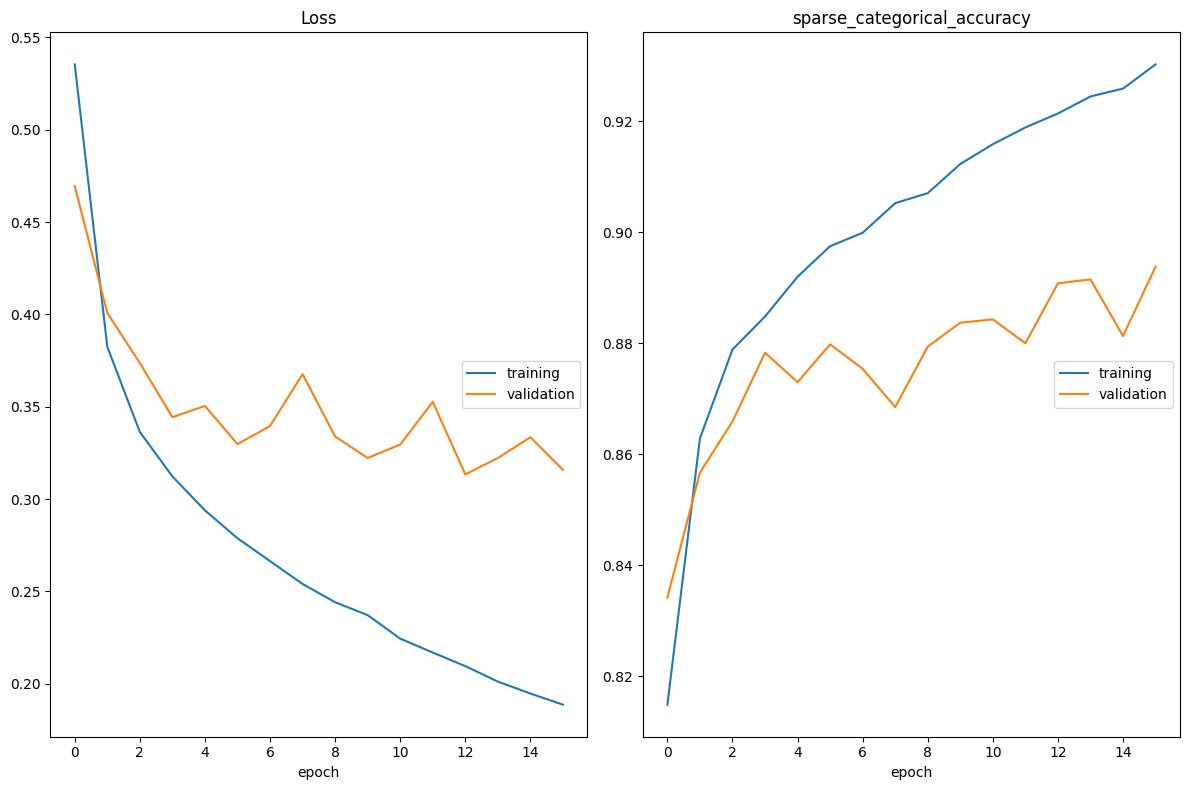

Loss
	training         	 (min:    0.189, max:    0.535, cur:    0.189)
	validation       	 (min:    0.313, max:    0.469, cur:    0.316)
sparse_categorical_accuracy
	training         	 (min:    0.815, max:    0.930, cur:    0.930)
	validation       	 (min:    0.834, max:    0.894, cur:    0.894)
938/938 [==============================] - 7s 7ms/step - loss: 0.1886 - sparse_categorical_accuracy: 0.9302 - val_loss: 0.3158 - val_sparse_categorical_accuracy: 0.8938


In [180]:
plot_losses = livelossplot.PlotLossesKeras()

history = model.fit(x_train, y_train,
                    epochs=16,
                    batch_size=64,
                    callbacks=[plot_losses],
                    validation_data=(x_test, y_test))

In [181]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('>val_accuracy: %.3f' % (acc * 100.0))

>val_accuracy: 89.380


In [198]:
loss = history.history['loss']
accu = history.history['sparse_categorical_accuracy']
v_loss = history.history['val_loss']
v_accu = history.history['val_sparse_categorical_accuracy']
for i in range(len(loss)):
    s = 'epochs: {:>2d}, loss: {:>7.3%}, accuracy: {:.3%},  val_loss: {:.3%}, val_accuracy: {:.3%}'.format((i+1), (loss[i]), (accu[i]), (v_loss[i]), (v_accu[i]))
    print(s)

epochs:  1, loss: 53.543%, accuracy: 81.490%,  val_loss: 46.946%, val_accuracy: 83.420%
epochs:  2, loss: 38.245%, accuracy: 86.285%,  val_loss: 40.080%, val_accuracy: 85.670%
epochs:  3, loss: 33.634%, accuracy: 87.887%,  val_loss: 37.368%, val_accuracy: 86.590%
epochs:  4, loss: 31.227%, accuracy: 88.482%,  val_loss: 34.432%, val_accuracy: 87.830%
epochs:  5, loss: 29.390%, accuracy: 89.198%,  val_loss: 35.047%, val_accuracy: 87.300%
epochs:  6, loss: 27.878%, accuracy: 89.748%,  val_loss: 32.975%, val_accuracy: 87.980%
epochs:  7, loss: 26.642%, accuracy: 89.990%,  val_loss: 33.958%, val_accuracy: 87.540%
epochs:  8, loss: 25.403%, accuracy: 90.523%,  val_loss: 36.769%, val_accuracy: 86.850%
epochs:  9, loss: 24.413%, accuracy: 90.703%,  val_loss: 33.387%, val_accuracy: 87.940%
epochs: 10, loss: 23.716%, accuracy: 91.228%,  val_loss: 32.227%, val_accuracy: 88.370%
epochs: 11, loss: 22.443%, accuracy: 91.585%,  val_loss: 32.951%, val_accuracy: 88.430%
epochs: 12, loss: 21.688%, accur

In [185]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


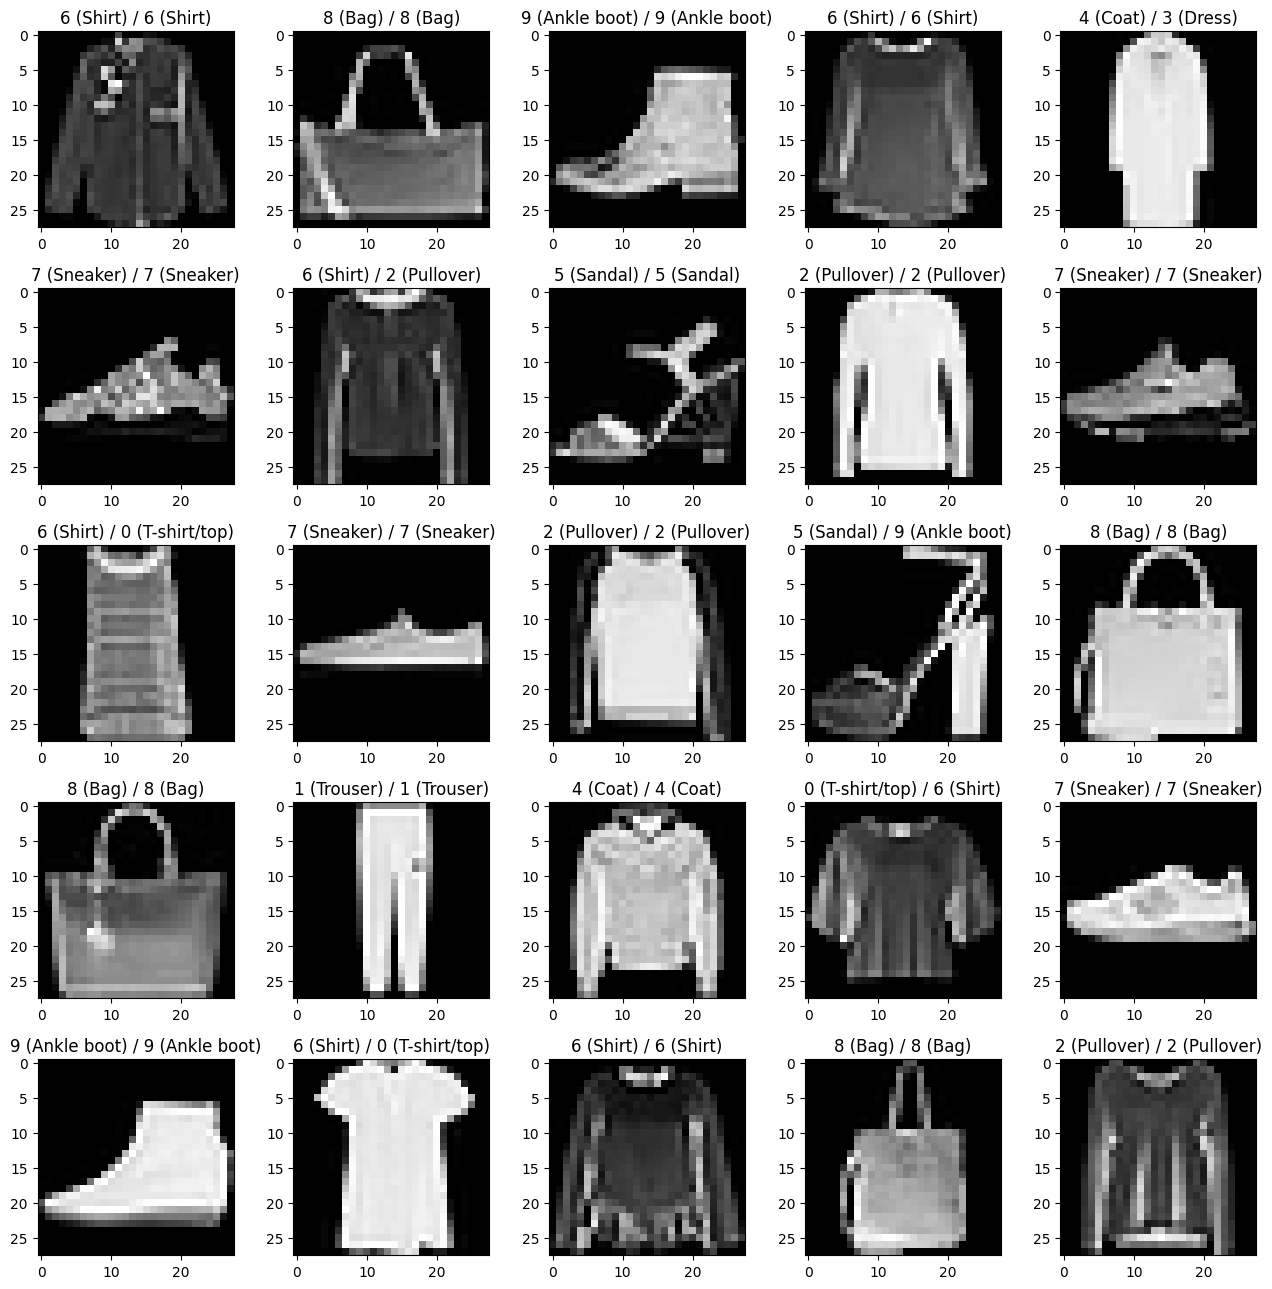

In [188]:
display_some_examples(x_test, y_test, predicts=pred, label_name=label_name)

## 3 шари нейронів з функціями активациї шарів "relu", "relu" та "softmax".
### Оптимізатор "SGD".


In [194]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
  # tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),
  # tf.keras.layers.Dropout(0.25),
  # tf.keras.layers.Dense(512, activation='relu'),
  # tf.keras.layers.Dropout(0.25),
  # tf.keras.layers.Dense(10)
  # tf.keras.layers.Dense(128, activation='sigmoid'),
  # tf.keras.layers.Dense(256, activation='sigmoid'),
  # tf.keras.layers.Dropout(0.25),
  # tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(
    # optimizer=tf.keras.optimizers.AdamW(0.0001),
    # optimizer=tf.keras.optimizers.Adam(0.0001),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.7),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

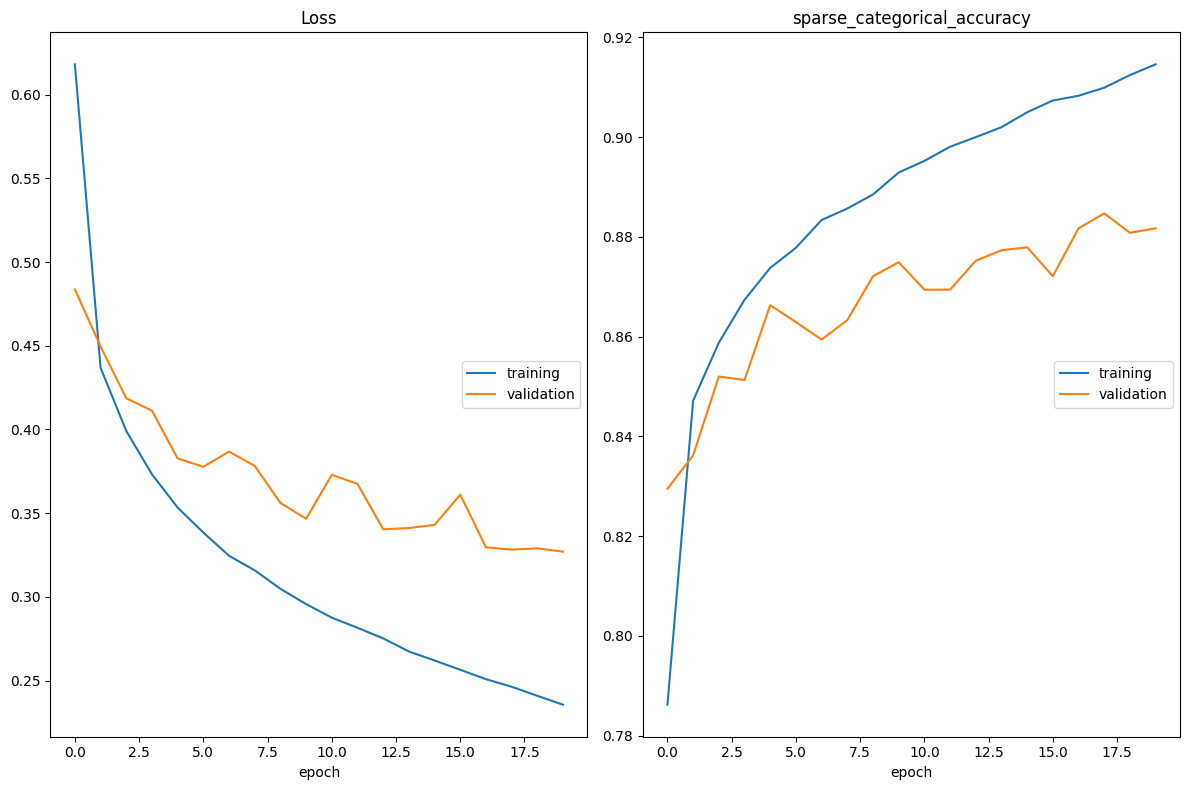

Loss
	training         	 (min:    0.236, max:    0.618, cur:    0.236)
	validation       	 (min:    0.327, max:    0.484, cur:    0.327)
sparse_categorical_accuracy
	training         	 (min:    0.786, max:    0.915, cur:    0.915)
	validation       	 (min:    0.830, max:    0.885, cur:    0.882)
938/938 [==============================] - 5s 5ms/step - loss: 0.2356 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.3270 - val_sparse_categorical_accuracy: 0.8817


In [195]:
plot_losses1 = livelossplot.PlotLossesKeras()

history1 = model1.fit(x_train, y_train,
                      epochs=20,
                      batch_size=64,
                      callbacks=[plot_losses1],
                      validation_data=(x_test, y_test))

In [196]:
_, acc = model1.evaluate(x_test, y_test, verbose=0)
print('>val_accuracy: %.3f' % (acc * 100.0))

>val_accuracy: 88.170


In [197]:
loss = history1.history['loss']
accu = history1.history['sparse_categorical_accuracy']
v_loss = history1.history['val_loss']
v_accu = history1.history['val_sparse_categorical_accuracy']
for i in range(len(loss)):
    s = 'epochs: {:>2d}, loss: {:>7.3%}, accuracy: {:.3%},  val_loss: {:.3%}, val_accuracy: {:.3%}'.format((i+1), (loss[i]), (accu[i]), (v_loss[i]), (v_accu[i]))
    print(s)

epochs:  1, loss: 61.806%, accuracy: 78.622%,  val_loss: 48.362%, val_accuracy: 82.950%
epochs:  2, loss: 43.683%, accuracy: 84.715%,  val_loss: 44.958%, val_accuracy: 83.620%
epochs:  3, loss: 39.910%, accuracy: 85.878%,  val_loss: 41.860%, val_accuracy: 85.200%
epochs:  4, loss: 37.320%, accuracy: 86.737%,  val_loss: 41.124%, val_accuracy: 85.130%
epochs:  5, loss: 35.335%, accuracy: 87.377%,  val_loss: 38.265%, val_accuracy: 86.630%
epochs:  6, loss: 33.842%, accuracy: 87.780%,  val_loss: 37.771%, val_accuracy: 86.290%
epochs:  7, loss: 32.454%, accuracy: 88.337%,  val_loss: 38.676%, val_accuracy: 85.940%
epochs:  8, loss: 31.585%, accuracy: 88.567%,  val_loss: 37.823%, val_accuracy: 86.330%
epochs:  9, loss: 30.482%, accuracy: 88.848%,  val_loss: 35.610%, val_accuracy: 87.210%
epochs: 10, loss: 29.568%, accuracy: 89.288%,  val_loss: 34.663%, val_accuracy: 87.490%
epochs: 11, loss: 28.759%, accuracy: 89.522%,  val_loss: 37.291%, val_accuracy: 86.940%
epochs: 12, loss: 28.154%, accur

In [199]:
pred1 = model1.predict(x_test)

313/313 [==============================] - 1s 3ms/step


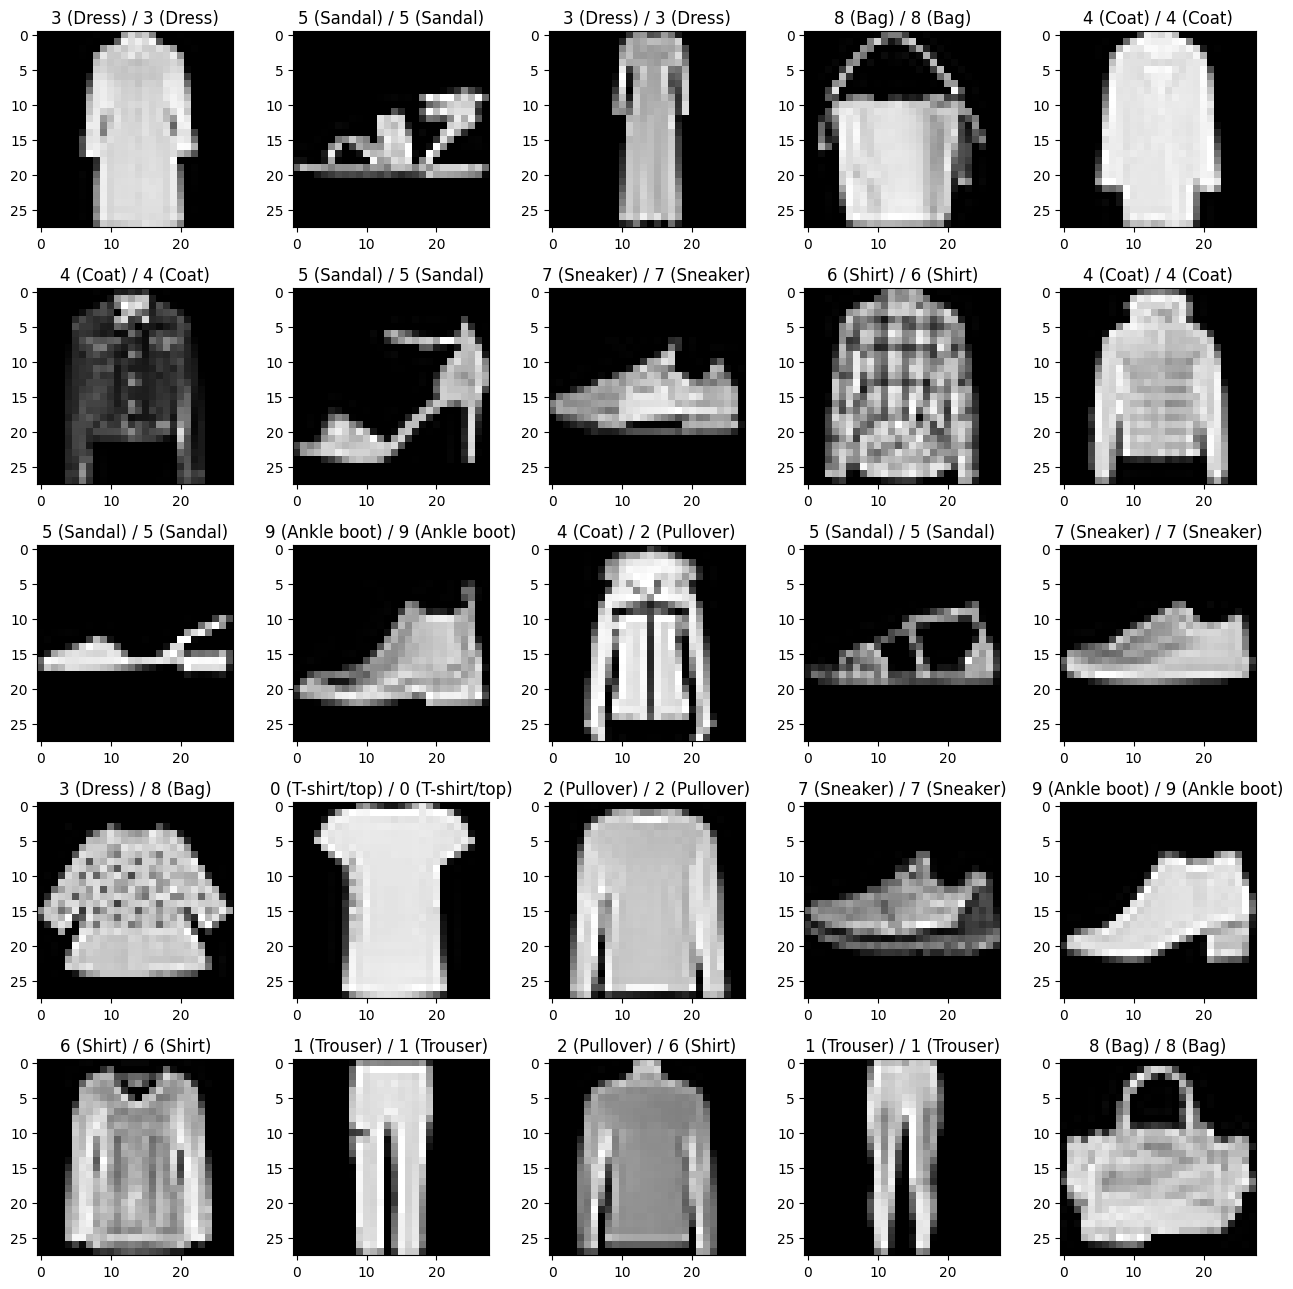

In [200]:
display_some_examples(x_test, y_test, predicts=pred1, label_name=label_name)

# Приклад нейроної мережі з інтернету для датасету "fashion_mnist".
## 3 шари нейронів з функціями активациї шарів "relu", "relu" та "softmax".


In [130]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers.legacy import SGD, Adam

In [142]:
def define_model(opt_name: str = 'SGD', learning_rate: float = 0.01):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = opt_name.upper()
    if opt is None or opt == 'SGD':
        lr = 0.01 if learning_rate is None else learning_rate
        opt = SGD(learning_rate=lr, momentum=0.9)
    elif opt == 'ADAM':
        lr = 0.001 if learning_rate is None else learning_rate
        opt = Adam(learning_rate=lr)
    print(f'optimizer: {opt_name}, learning_rate: {learning_rate}')

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [132]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX = trainX / 255.0
testX = testX / 255.0


### Оптимізатор "SGD".

In [137]:
model_0 = define_model()

optimizer: SGD, learning_rate: 0.01


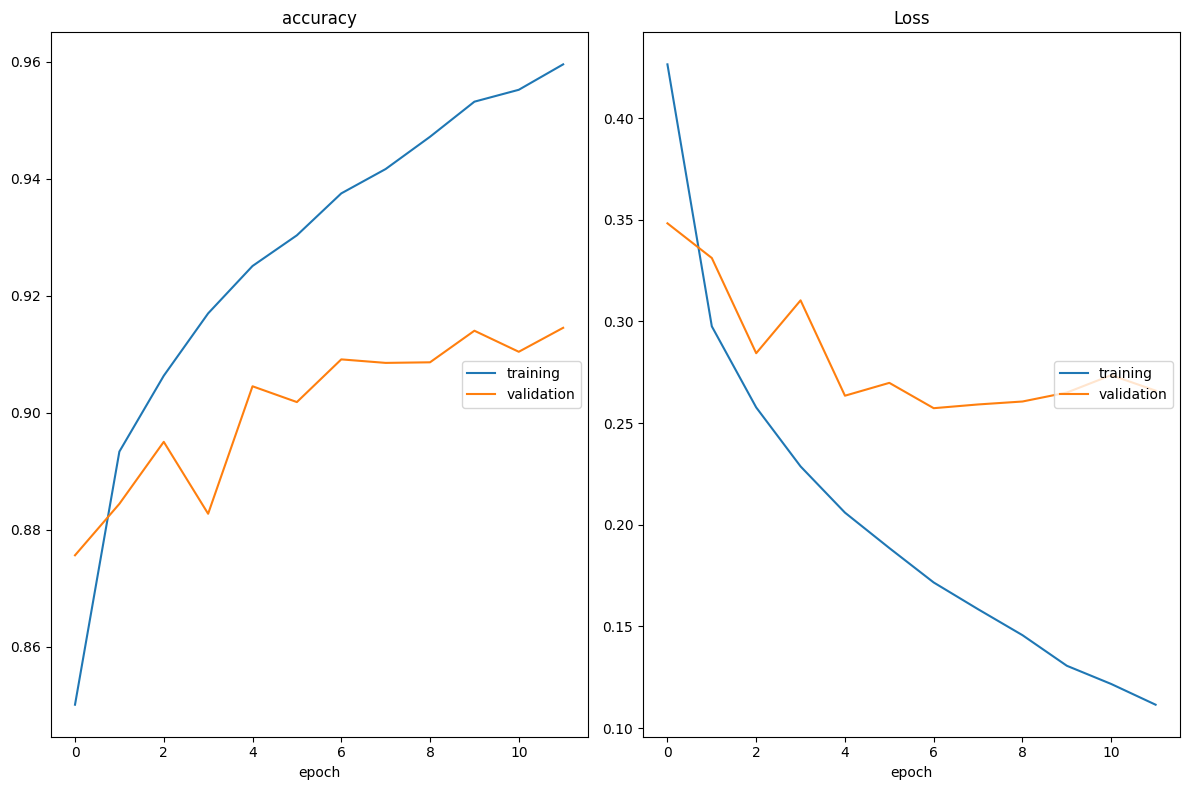

accuracy
	training         	 (min:    0.850, max:    0.960, cur:    0.960)
	validation       	 (min:    0.876, max:    0.914, cur:    0.914)
Loss
	training         	 (min:    0.111, max:    0.426, cur:    0.111)
	validation       	 (min:    0.257, max:    0.348, cur:    0.266)
938/938 [==============================] - 29s 31ms/step - loss: 0.1115 - accuracy: 0.9596 - val_loss: 0.2660 - val_accuracy: 0.9145


In [138]:
plot_losses_0 = livelossplot.PlotLossesKeras()

history_0 = model_0.fit(trainX, trainY,
                        epochs=12,
                        batch_size=64,
                        callbacks=[plot_losses_0],
                        validation_data=(testX, testY))

In [139]:
_, acc = model_0.evaluate(testX, testY, verbose=0)
print('>val_accuracy: %.3f' % (acc * 100.0))


>val_accuracy: 91.450


In [203]:
loss = history_0.history['loss']
accu = history_0.history['accuracy']
v_loss = history_0.history['val_loss']
v_accu = history_0.history['val_accuracy']
for i in range(len(loss)):
    s = 'epochs: {:>2d}, loss: {:>7.3%}, accuracy: {:.3%},  val_loss: {:.3%}, val_accuracy: {:.3%}'.format((i+1), (loss[i]), (accu[i]), (v_loss[i]), (v_accu[i]))
    print(s)

epochs:  1, loss: 42.645%, accuracy: 85.005%,  val_loss: 34.826%, val_accuracy: 87.560%
epochs:  2, loss: 29.759%, accuracy: 89.333%,  val_loss: 33.121%, val_accuracy: 88.440%
epochs:  3, loss: 25.772%, accuracy: 90.630%,  val_loss: 28.437%, val_accuracy: 89.500%
epochs:  4, loss: 22.870%, accuracy: 91.697%,  val_loss: 31.038%, val_accuracy: 88.270%
epochs:  5, loss: 20.597%, accuracy: 92.507%,  val_loss: 26.348%, val_accuracy: 90.450%
epochs:  6, loss: 18.855%, accuracy: 93.032%,  val_loss: 26.980%, val_accuracy: 90.180%
epochs:  7, loss: 17.161%, accuracy: 93.748%,  val_loss: 25.734%, val_accuracy: 90.910%
epochs:  8, loss: 15.846%, accuracy: 94.165%,  val_loss: 25.918%, val_accuracy: 90.850%
epochs:  9, loss: 14.570%, accuracy: 94.717%,  val_loss: 26.062%, val_accuracy: 90.860%
epochs: 10, loss: 13.065%, accuracy: 95.317%,  val_loss: 26.503%, val_accuracy: 91.400%
epochs: 11, loss: 12.169%, accuracy: 95.520%,  val_loss: 27.357%, val_accuracy: 91.040%
epochs: 12, loss: 11.150%, accur

In [201]:
pred_0 = model_0.predict(testX)

313/313 [==============================] - 2s 5ms/step


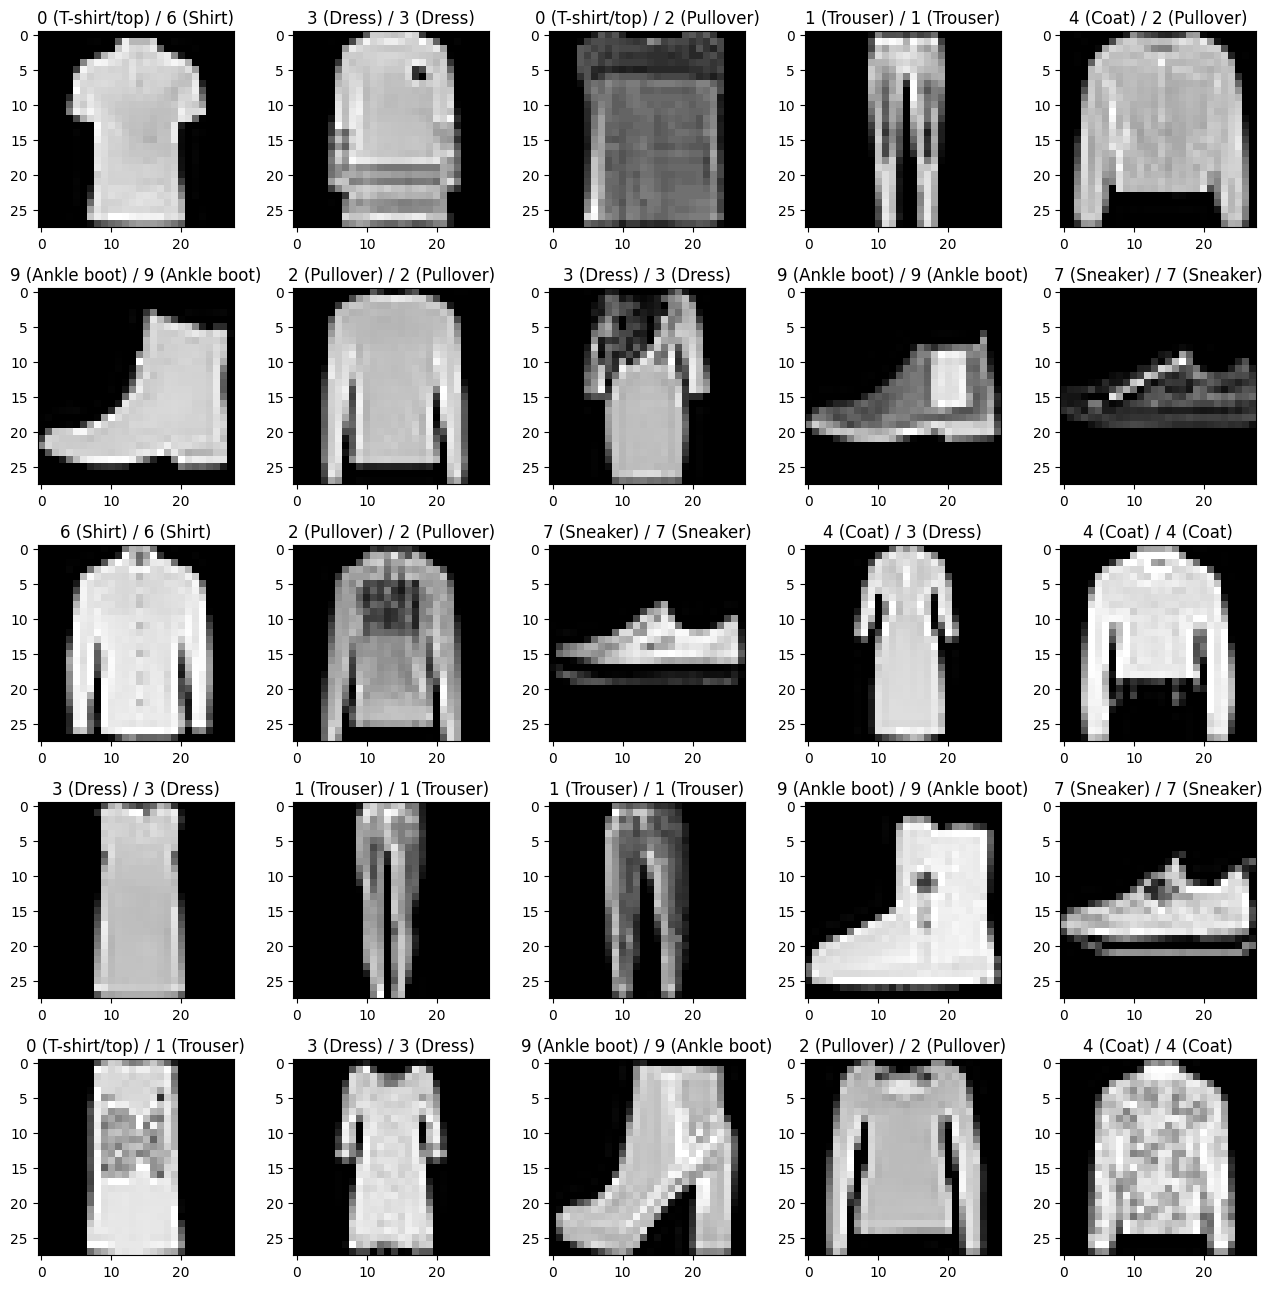

In [202]:
display_some_examples(testX, testY, pred_0, label_name=label_name)

### Оптимізатор "Adam".

In [152]:
model_1 = define_model(opt_name = 'Adam', learning_rate = 0.001)

optimizer: Adam, learning_rate: 0.001


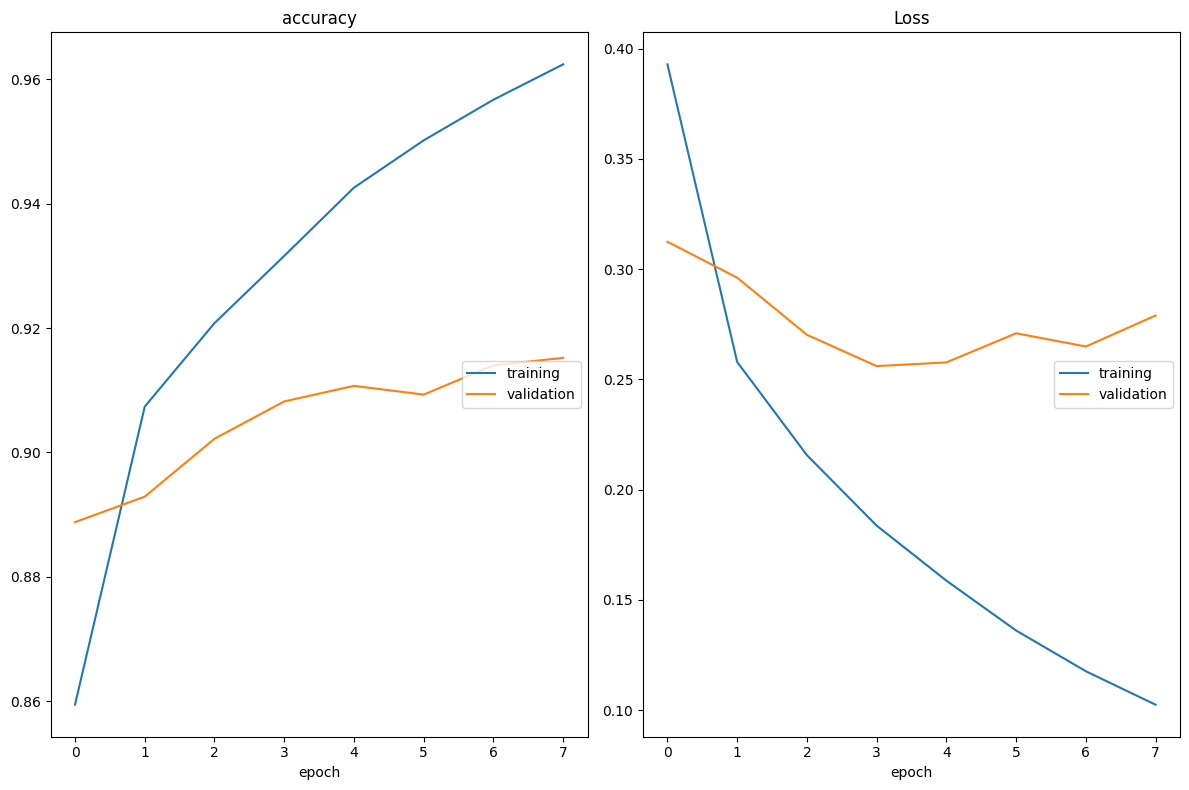

accuracy
	training         	 (min:    0.859, max:    0.962, cur:    0.962)
	validation       	 (min:    0.889, max:    0.915, cur:    0.915)
Loss
	training         	 (min:    0.102, max:    0.393, cur:    0.102)
	validation       	 (min:    0.256, max:    0.312, cur:    0.279)
938/938 [==============================] - 30s 32ms/step - loss: 0.1024 - accuracy: 0.9624 - val_loss: 0.2789 - val_accuracy: 0.9152


In [153]:
plot_losses_1 = livelossplot.PlotLossesKeras()

history_1 = model_1.fit(trainX, trainY,
                        epochs=8,
                        batch_size=64,
                        callbacks=[plot_losses_1],
                        validation_data=(testX, testY))

In [154]:
_, acc = model_1.evaluate(testX, testY, verbose=0)
print('>val_accuracy: %.3f' % (acc * 100.0))

>val_accuracy: 91.520


In [204]:
loss = history_1.history['loss']
accu = history_1.history['accuracy']
v_loss = history_1.history['val_loss']
v_accu = history_1.history['val_accuracy']
for i in range(len(loss)):
    s = 'epochs: {:>2d}, loss: {:>7.3%}, accuracy: {:.3%},  val_loss: {:.3%}, val_accuracy: {:.3%}'.format((i+1), (loss[i]), (accu[i]), (v_loss[i]), (v_accu[i]))
    print(s)

epochs:  1, loss: 39.282%, accuracy: 85.947%,  val_loss: 31.237%, val_accuracy: 88.880%
epochs:  2, loss: 25.786%, accuracy: 90.737%,  val_loss: 29.608%, val_accuracy: 89.290%
epochs:  3, loss: 21.560%, accuracy: 92.078%,  val_loss: 27.019%, val_accuracy: 90.220%
epochs:  4, loss: 18.365%, accuracy: 93.158%,  val_loss: 25.599%, val_accuracy: 90.820%
epochs:  5, loss: 15.868%, accuracy: 94.255%,  val_loss: 25.765%, val_accuracy: 91.070%
epochs:  6, loss: 13.608%, accuracy: 95.015%,  val_loss: 27.087%, val_accuracy: 90.930%
epochs:  7, loss: 11.761%, accuracy: 95.668%,  val_loss: 26.487%, val_accuracy: 91.400%
epochs:  8, loss: 10.243%, accuracy: 96.237%,  val_loss: 27.891%, val_accuracy: 91.520%


In [205]:
pred_1 = model_1.predict(testX)

313/313 [==============================] - 2s 6ms/step


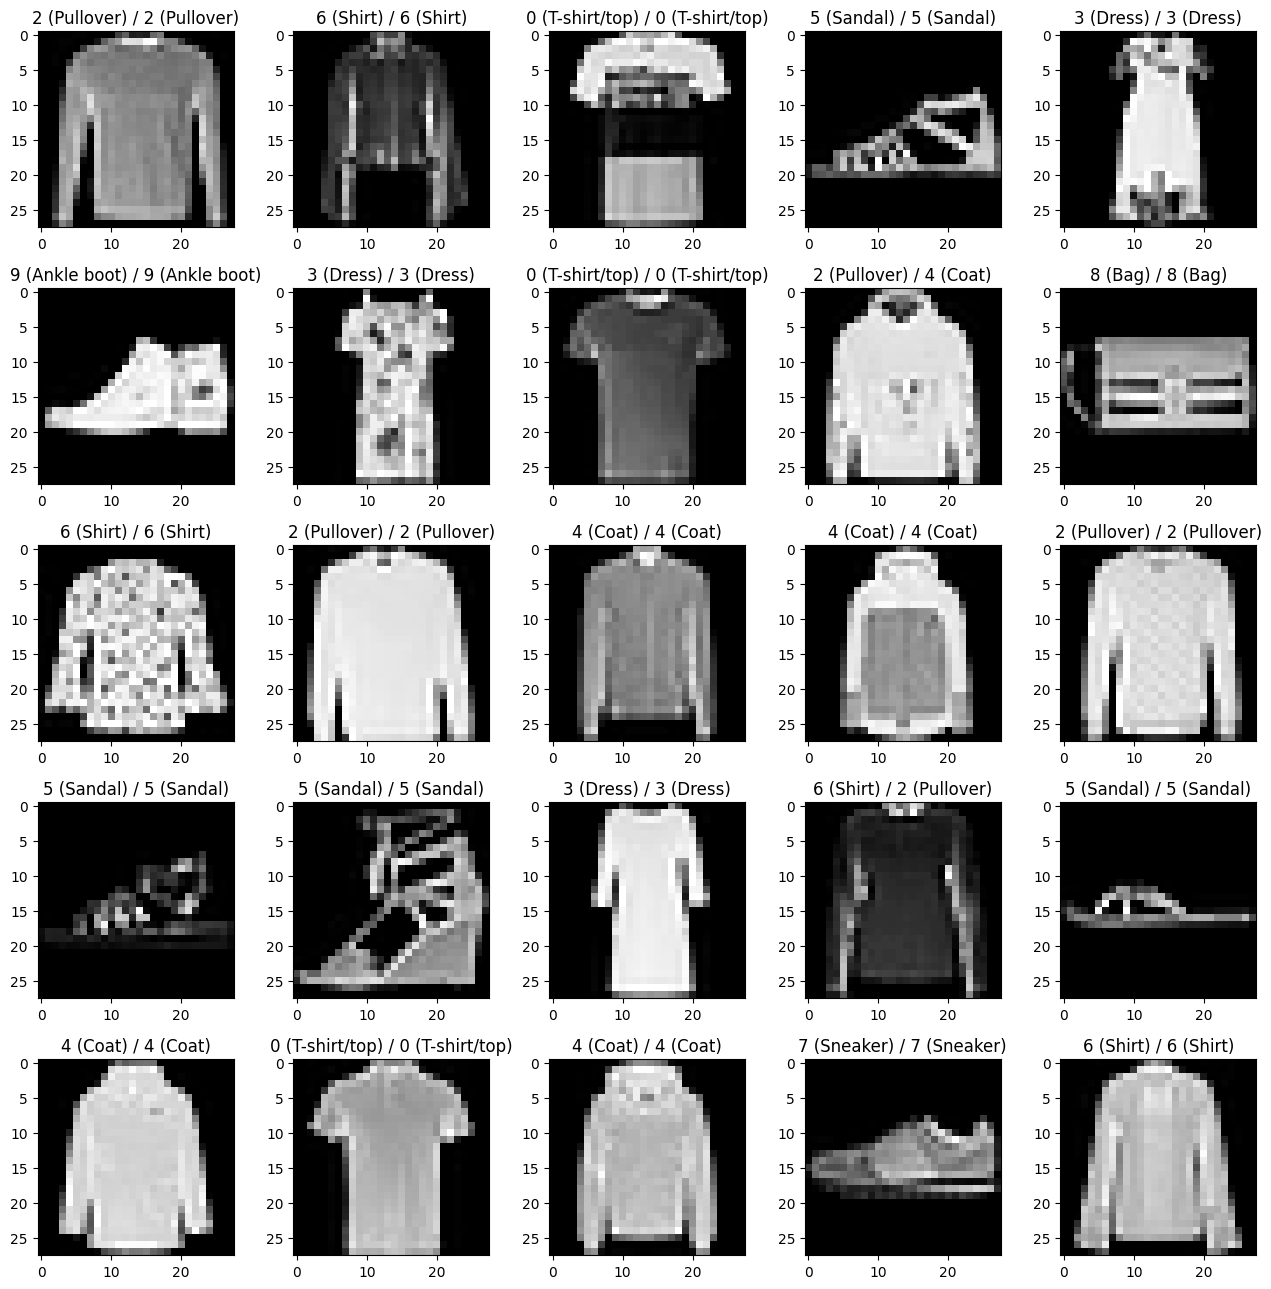

In [206]:
display_some_examples(x_test, y_test, pred_1, label_name=label_name)